In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error

In [8]:
# Function to create LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [9]:
# Function to load and process stock data
def load_processed_data(stock_symbols, data_dir):
    data = {}
    for symbol in stock_symbols:
        file_path = os.path.join(data_dir, f'{symbol}_data.csv')
        df = pd.read_csv(file_path)
        df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        data[symbol] = df
    return data

In [10]:
# Function to prepare data for training
def prepare_training_data(df, time_step=60):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    
    X, y = [], []
    for i in range(time_step, len(scaled_data)):
        X.append(scaled_data[i-time_step:i, :])
        y.append(scaled_data[i, 3])  # Assuming 'Close' price is the target
    X, y = np.array(X), np.array(y)
    return X, y


In [11]:
# Function to plot the training and validation loss
def plot_loss(history, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {symbol}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to plot predictions vs actual values
def plot_predictions(y_val, predictions, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(y_val, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Prices for {symbol}')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

Training model for AAPL
Epoch 1/100


c:\Users\majdt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.9378 - val_loss: 0.6571
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.6075 - val_loss: 0.4606
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4256 - val_loss: 0.3202
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2985 - val_loss: 0.2242
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2097 - val_loss: 0.1584
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1493 - val_loss: 0.1137
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1083 - val_loss: 0.0834
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0809 - val_loss: 0.0636
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0624 - val_loss: 0.0498
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0492 - val_loss: 0.0391
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0398 - val_loss: 0.0338
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0

Model for AAPL saved to models\AAPL_lstm_model.h5
Training history for AAPL saved to models\AAPL_lstm_history.csv


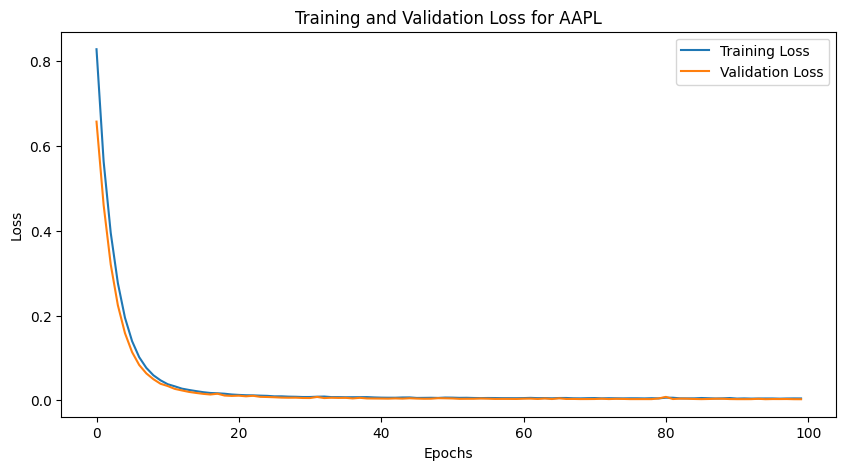

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Validation MSE for AAPL: 0.0017673742347346505


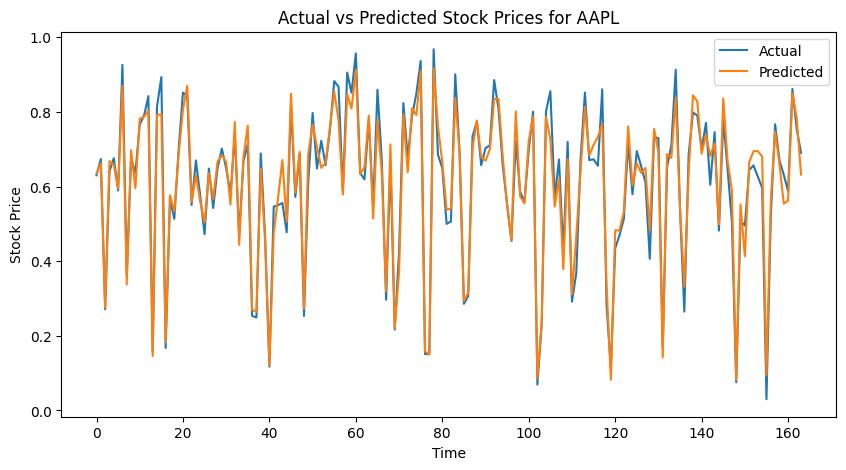

Training model for GOOGL
Epoch 1/100


c:\Users\majdt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.9509 - val_loss: 0.6688
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.6167 - val_loss: 0.4629
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4291 - val_loss: 0.3221
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2999 - val_loss: 0.2250
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2099 - val_loss: 0.1584
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1496 - val_loss: 0.1136
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1086 - val_loss: 0.0835
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0807 - val_loss: 0.0633
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0631 - val_loss: 0.0497
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0502 - val_loss: 0.0397
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0416 - val_loss: 0.0366
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0

Model for GOOGL saved to models\GOOGL_lstm_model.h5
Training history for GOOGL saved to models\GOOGL_lstm_history.csv


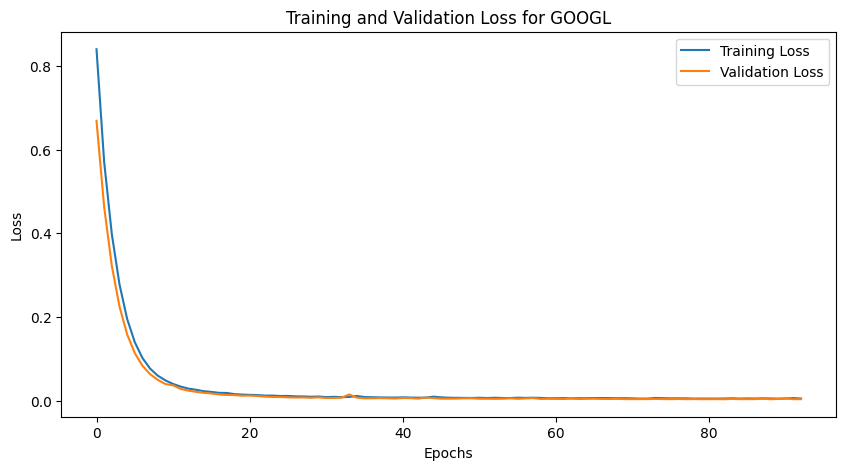

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Validation MSE for GOOGL: 0.0023570939615652


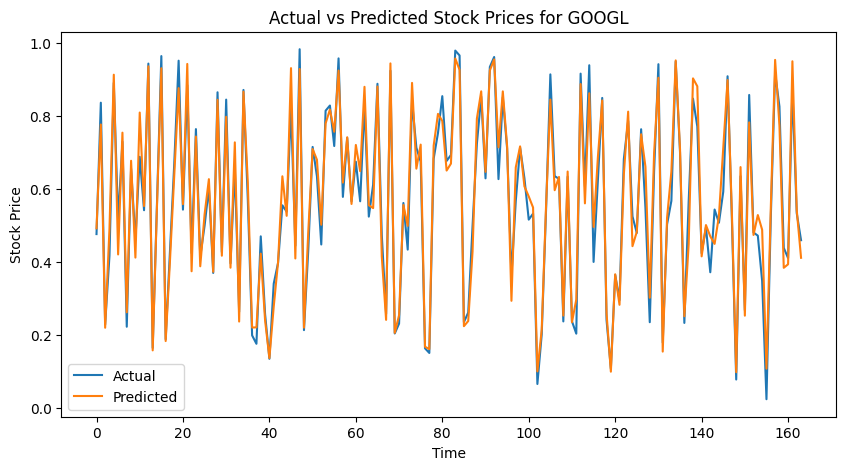

Training model for MSFT
Epoch 1/100


c:\Users\majdt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 1.0139 - val_loss: 0.7006
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.6454 - val_loss: 0.4991
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.4647 - val_loss: 0.3583
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3350 - val_loss: 0.2598
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2439 - val_loss: 0.1906
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1801 - val_loss: 0.1421
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1366 - val_loss: 0.1083
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1053 - val_loss: 0.0846
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0828 - val_loss: 0.0675
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0670 - val_loss: 0.0552
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0559 - val_loss: 0.0459
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0

Model for MSFT saved to models\MSFT_lstm_model.h5
Training history for MSFT saved to models\MSFT_lstm_history.csv


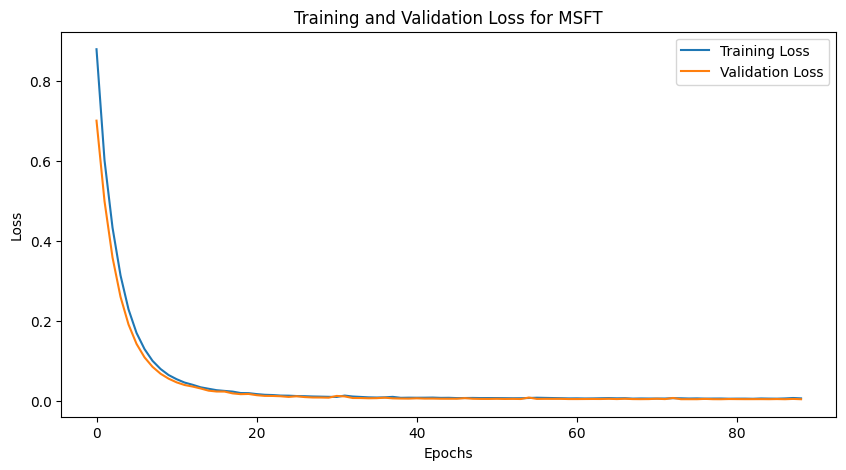

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Validation MSE for MSFT: 0.002512493335857861


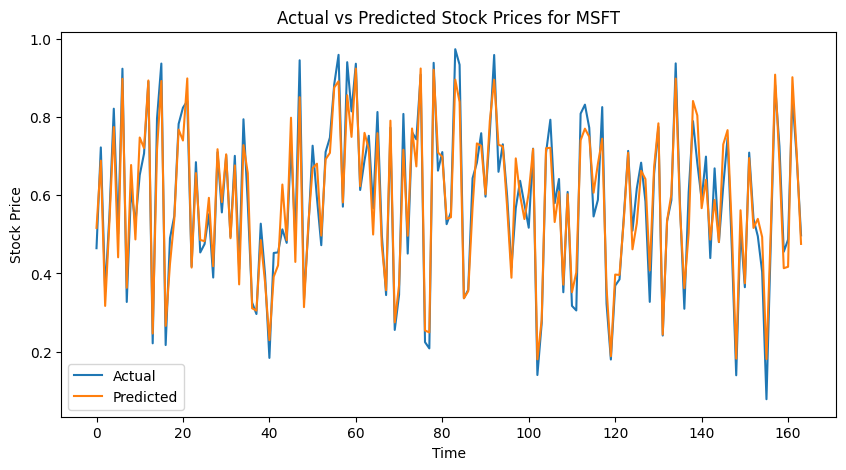

In [12]:

# Define the stock symbols and data directory
stock_symbols = ['AAPL', 'GOOGL', 'MSFT']
data_dir = 'data'
models_dir = 'models'

# Ensure models directory exists
os.makedirs(models_dir, exist_ok=True)

# Load processed data
processed_data = load_processed_data(stock_symbols, data_dir)

# Training models for each stock
history_dict = {}

for symbol, data in processed_data.items():
    print(f"Training model for {symbol}")
    
    # Prepare training data
    time_step = 60
    X, y = prepare_training_data(data, time_step)
    
    # Reshape X for LSTM input
    X = np.reshape(X, (X.shape[0], X.shape[1], data.shape[1]))
    
    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and compile the LSTM model
    model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
    
    # Train the model with validation data
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Save the trained model
    model_file_path = os.path.join(models_dir, f'{symbol}_lstm_model.h5')
    model.save(model_file_path)
    print(f"Model for {symbol} saved to {model_file_path}")
    
    # Save the training history for later analysis
    history_file_path = os.path.join(models_dir, f'{symbol}_lstm_history.csv')
    pd.DataFrame(history.history).to_csv(history_file_path)
    print(f"Training history for {symbol} saved to {history_file_path}")
    
    # Store history for plotting
    history_dict[symbol] = history
    
    # Plot training and validation loss
    plot_loss(history, symbol)
    
    # Predict validation data
    predictions = model.predict(X_val)
    
    # Compute loss
    mse = mean_squared_error(y_val, predictions)
    print(f'Validation MSE for {symbol}: {mse}')
    
    # Plot actual vs predicted values
    plot_predictions(y_val, predictions, symbol)

In [13]:
pip install datetime

     ---------------------------------------- 0.0/44.1 kB ? eta -:--:--
     ------------------------------------- -- 41.0/44.1 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 44.1/44.1 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   ---------------------------------------- 52.6/52.6 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/206.4 kB ? eta -:--:--
   ----------------- ---------------------- 92.2/206.4 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------  204.8/206.4 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 206.4/206.4 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
